In [50]:
# necessary imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings(action='ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)

In [51]:
df=pd.read_csv('chronic_kidney_disease.csv')
df.head(8)

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   
5   5  60.0  90.0  1.015  3.0  0.0     NaN       NaN  notpresent  notpresent   
6   6  68.0  70.0  1.010  0.0  0.0     NaN    normal  notpresent  notpresent   
7   7  24.0   NaN  1.015  2.0  4.0  normal  abnormal  notpresent  notpresent   

     bgr    bu    sc    sod  pot  hemo pcv    wc   rc  htn   dm cad appet  \
0  121.0  36.0   1.2    NaN  NaN  15.4  44  7800  5.2  yes  yes  no  good   
1    NaN  18.0   0.8    NaN  NaN  11.3  38  6000  NaN   no   no  no  good   
2  423.0  53.0   1.8    NaN  NaN   9.6  31  7500  NaN   no  yes  no  poor   
3  117.0  56.0   3.8  111.0  2.5  11.2  32  6700  3.9  yes   no  no  poor   
4  106.0  26.0   1.4    NaN  NaN  11.6  35  7300  4.6   no   no  no  good   
5   74.0  25.0   1.1  142.0  3.2  12.2  39  7800  4.4  yes  yes  no  good   
6  100.0  54.0  24.0  104.0  4.0  12.4  36   NaN  NaN   no   no  no  good   
7  410.0  31.0   1.1    NaN  NaN  12.4  44  6900    5   no  yes  no  good   

    pe  ane classification  
0   no   no            ckd  
1   no   no            ckd  
2   no  yes            ckd  
3  yes  yes            ckd  
4   no   no            ckd  
5  yes   no            ckd  
6   no   no            ckd  
7  yes   no            ckd

In [52]:
df.shape

(400, 26)

In [53]:
# drop id column and describe the unique value of out
df.drop('id', axis = 1, inplace = True)
for i in df.columns:
    print('unique values in "{}":\n'.format(i),df[i].unique())

unique values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in "bp":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in "sg":
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in "al":
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in "su":
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in "rbc":
 [nan 'normal' 'abnormal']
unique values in "pc":
 ['normal' 'abnormal' nan]
unique values in "pcc":
 ['notpresent' 'present' nan]
unique values in "ba":
 ['notpresent' 'present' nan]
unique values in "bgr":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79.

In [54]:
feature_names=['Age (yrs)','Blood Pressure (mm/Hg)','Specific Gravity','Albumin','Sugar','Red Blood Cells',
               'Pus Cells','Pus Cell Clumps','Bacteria','Blood Glucose Random (mgs/dL)','Blood Urea (mgs/dL)',
               'Serum Creatinine (mgs/dL)','Sodium (mEq/L)','Potassium (mEq/L)','Hemoglobin (gms)','Packed Cell Volume',
               'White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)','Hypertension','Diabetes Mellitus',
               'Coronary Artery Disease','Appetite','Pedal Edema','Anemia','class']
df.columns=feature_names

In [55]:
df.head()

Age (yrs)  Blood Pressure (mm/Hg)  Specific Gravity  Albumin  Sugar  \
0       48.0                    80.0             1.020      1.0    0.0   
1        7.0                    50.0             1.020      4.0    0.0   
2       62.0                    80.0             1.010      2.0    3.0   
3       48.0                    70.0             1.005      4.0    0.0   
4       51.0                    80.0             1.010      2.0    0.0   

  Red Blood Cells Pus Cells Pus Cell Clumps    Bacteria  \
0             NaN    normal      notpresent  notpresent   
1             NaN    normal      notpresent  notpresent   
2          normal    normal      notpresent  notpresent   
3          normal  abnormal         present  notpresent   
4          normal    normal      notpresent  notpresent   

   Blood Glucose Random (mgs/dL)  Blood Urea (mgs/dL)  \
0                          121.0                 36.0   
1                            NaN                 18.0   
2                          423.0                 53.0   
3                          117.0                 56.0   
4                          106.0                 26.0   

   Serum Creatinine (mgs/dL)  Sodium (mEq/L)  Potassium (mEq/L)  \
0                        1.2             NaN                NaN   
1                        0.8             NaN                NaN   
2                        1.8             NaN                NaN   
3                        3.8           111.0                2.5   
4                        1.4             NaN                NaN   

   Hemoglobin (gms) Packed Cell Volume White Blood Cells (cells/cmm)  \
0              15.4                 44                          7800   
1              11.3                 38                          6000   
2               9.6                 31                          7500   
3              11.2                 32                          6700   
4              11.6                 35                          7300   

  Red Blood Cells (millions/cmm) Hypertension Diabetes Mellitus  \
0                            5.2          yes               yes   
1                            NaN           no                no   
2                            NaN           no               yes   
3                            3.9          yes                no   
4                            4.6           no                no   

  Coronary Artery Disease Appetite Pedal Edema Anemia class  
0                      no     good          no     no   ckd  
1                      no     good          no     no   ckd  
2                      no     poor          no    yes   ckd  
3                      no     poor         yes    yes   ckd  
4                      no     good          no     no   ckd

In [56]:
df.describe()

Age (yrs)  Blood Pressure (mm/Hg)  Specific Gravity     Albumin  \
count  391.000000              388.000000        353.000000  354.000000   
mean    51.483376               76.469072          1.017408    1.016949   
std     17.169714               13.683637          0.005717    1.352679   
min      2.000000               50.000000          1.005000    0.000000   
25%     42.000000               70.000000          1.010000    0.000000   
50%     55.000000               80.000000          1.020000    0.000000   
75%     64.500000               80.000000          1.020000    2.000000   
max     90.000000              180.000000          1.025000    5.000000   

            Sugar  Blood Glucose Random (mgs/dL)  Blood Urea (mgs/dL)  \
count  351.000000                     356.000000           381.000000   
mean     0.450142                     148.036517            57.425722   
std      1.099191                      79.281714            50.503006   
min      0.000000                      22.000000             1.500000   
25%      0.000000                      99.000000            27.000000   
50%      0.000000                     121.000000            42.000000   
75%      0.000000                     163.000000            66.000000   
max      5.000000                     490.000000           391.000000   

       Serum Creatinine (mgs/dL)  Sodium (mEq/L)  Potassium (mEq/L)  \
count                 383.000000      313.000000         312.000000   
mean                    3.072454      137.528754           4.627244   
std                     5.741126       10.408752           3.193904   
min                     0.400000        4.500000           2.500000   
25%                     0.900000      135.000000           3.800000   
50%                     1.300000      138.000000           4.400000   
75%                     2.800000      142.000000           4.900000   
max                    76.000000      163.000000          47.000000   

       Hemoglobin (gms)  
count        348.000000  
mean          12.526437  
std            2.912587  
min            3.100000  
25%           10.300000  
50%           12.650000  
75%           15.000000  
max           17.800000

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age (yrs)                       391 non-null    float64
 1   Blood Pressure (mm/Hg)          388 non-null    float64
 2   Specific Gravity                353 non-null    float64
 3   Albumin                         354 non-null    float64
 4   Sugar                           351 non-null    float64
 5   Red Blood Cells                 248 non-null    object 
 6   Pus Cells                       335 non-null    object 
 7   Pus Cell Clumps                 396 non-null    object 
 8   Bacteria                        396 non-null    object 
 9   Blood Glucose Random (mgs/dL)   356 non-null    float64
 10  Blood Urea (mgs/dL)             381 non-null    float64
 11  Serum Creatinine (mgs/dL)       383 non-null    float64
 12  Sodium (mEq/L)                  313 

In [58]:
# converting necessary columns to numerical type
df['Packed Cell Volume'] = pd.to_numeric(df['Packed Cell Volume'], errors='coerce')
df['White Blood Cells (cells/cmm)'] = pd.to_numeric(df['White Blood Cells (cells/cmm)'], errors='coerce')
df['Red Blood Cells (millions/cmm)'] = pd.to_numeric(df['Red Blood Cells (millions/cmm)'], errors='coerce')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age (yrs)                       391 non-null    float64
 1   Blood Pressure (mm/Hg)          388 non-null    float64
 2   Specific Gravity                353 non-null    float64
 3   Albumin                         354 non-null    float64
 4   Sugar                           351 non-null    float64
 5   Red Blood Cells                 248 non-null    object 
 6   Pus Cells                       335 non-null    object 
 7   Pus Cell Clumps                 396 non-null    object 
 8   Bacteria                        396 non-null    object 
 9   Blood Glucose Random (mgs/dL)   356 non-null    float64
 10  Blood Urea (mgs/dL)             381 non-null    float64
 11  Serum Creatinine (mgs/dL)       383 non-null    float64
 12  Sodium (mEq/L)                  313 

In [60]:
#Let's deal with mistyped features now
for i in df.columns:
    print("unique values in {}:\n".format(i),df[i].unique())

unique values in Age (yrs):
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in Blood Pressure (mm/Hg):
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in Specific Gravity:
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in Albumin:
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in Sugar:
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in Red Blood Cells:
 [nan 'normal' 'abnormal']
unique values in Pus Cells:
 ['normal' 'abnormal' nan]
unique values in Pus Cell Clumps:
 ['notpresent' 'present' nan]
unique values in Bacteria:
 ['notpresent' 'present' nan]
unique values in Blood Glucose Random (mgs/dL):
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99.

we see that the re is ambiguity in some columns.
=> we will replace the incorrect values

In [61]:
mistyped=['Packed Cell Volume','White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)']
numeric=[]
for i in df.columns:
    if df[i].dtype=='float64':
        numeric.append(i)
numeric=numeric+mistyped

In [62]:
for col in mistyped:
        df[col]=df[col].astype('float')

In [63]:
print(df['Packed Cell Volume'].unique())
print(df['White Blood Cells (cells/cmm)'].unique())
print(df['Red Blood Cells (millions/cmm)'].unique())

[44. 38. 31. 32. 35. 39. 36. 33. 29. 28. nan 16. 24. 37. 30. 34. 40. 45.
 27. 48. 52. 14. 22. 18. 42. 17. 46. 23. 19. 25. 41. 26. 15. 21. 43. 20.
 47.  9. 49. 50. 53. 51. 54.]
[ 7800.  6000.  7500.  6700.  7300.    nan  6900.  9600. 12100.  4500.
 12200. 11000.  3800. 11400.  5300.  9200.  6200.  8300.  8400. 10300.
  9800.  9100.  7900.  6400.  8600. 18900. 21600.  4300.  8500. 11300.
  7200.  7700. 14600.  6300.  7100. 11800.  9400.  5500.  5800. 13200.
 12500.  5600.  7000. 11900. 10400. 10700. 12700.  6800.  6500. 13600.
 10200.  9000. 14900.  8200. 15200.  5000. 16300. 12400. 10500.  4200.
  4700. 10900.  8100.  9500.  2200. 12800. 11200. 19100. 12300. 16700.
  2600. 26400.  8800.  7400.  4900.  8000. 12000. 15700.  4100.  5700.
 11500.  5400. 10800.  9900.  5200.  5900.  9300.  9700.  5100.  6600.]
[5.2 nan 3.9 4.6 4.4 5.  4.  3.7 3.8 3.4 2.6 2.8 4.3 3.2 3.6 4.1 4.9 2.5
 4.2 4.5 3.1 4.7 3.5 6.  2.1 5.6 2.3 2.9 2.7 8.  3.3 3.  2.4 4.8 5.4 6.1
 6.2 6.3 5.1 5.8 5.5 5.3 6.4 5.7 5.9 6

In [64]:
# replace incorrect values

df['Diabetes Mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['Coronary Artery Disease'] = df['Coronary Artery Disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [65]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [66]:
cols = ['Diabetes Mellitus', 'Coronary Artery Disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

Diabetes Mellitus has ['yes' 'no' nan] values

Coronary Artery Disease has ['no' 'yes' nan] values

class has [0 1] values



In [67]:
categoricals=[]
for col in df.columns:
    if not col in numeric:
        categoricals.append(col)
categoricals.remove('Chronic Kidney Disease')

ValueError: list.remove(x): x not in list

In [68]:
categoricals

['Red Blood Cells',
 'Pus Cells',
 'Pus Cell Clumps',
 'Bacteria',
 'Hypertension',
 'Diabetes Mellitus',
 'Coronary Artery Disease',
 'Appetite',
 'Pedal Edema',
 'Anemia',
 'class']

In [69]:
# explore more our data to pick imputation method

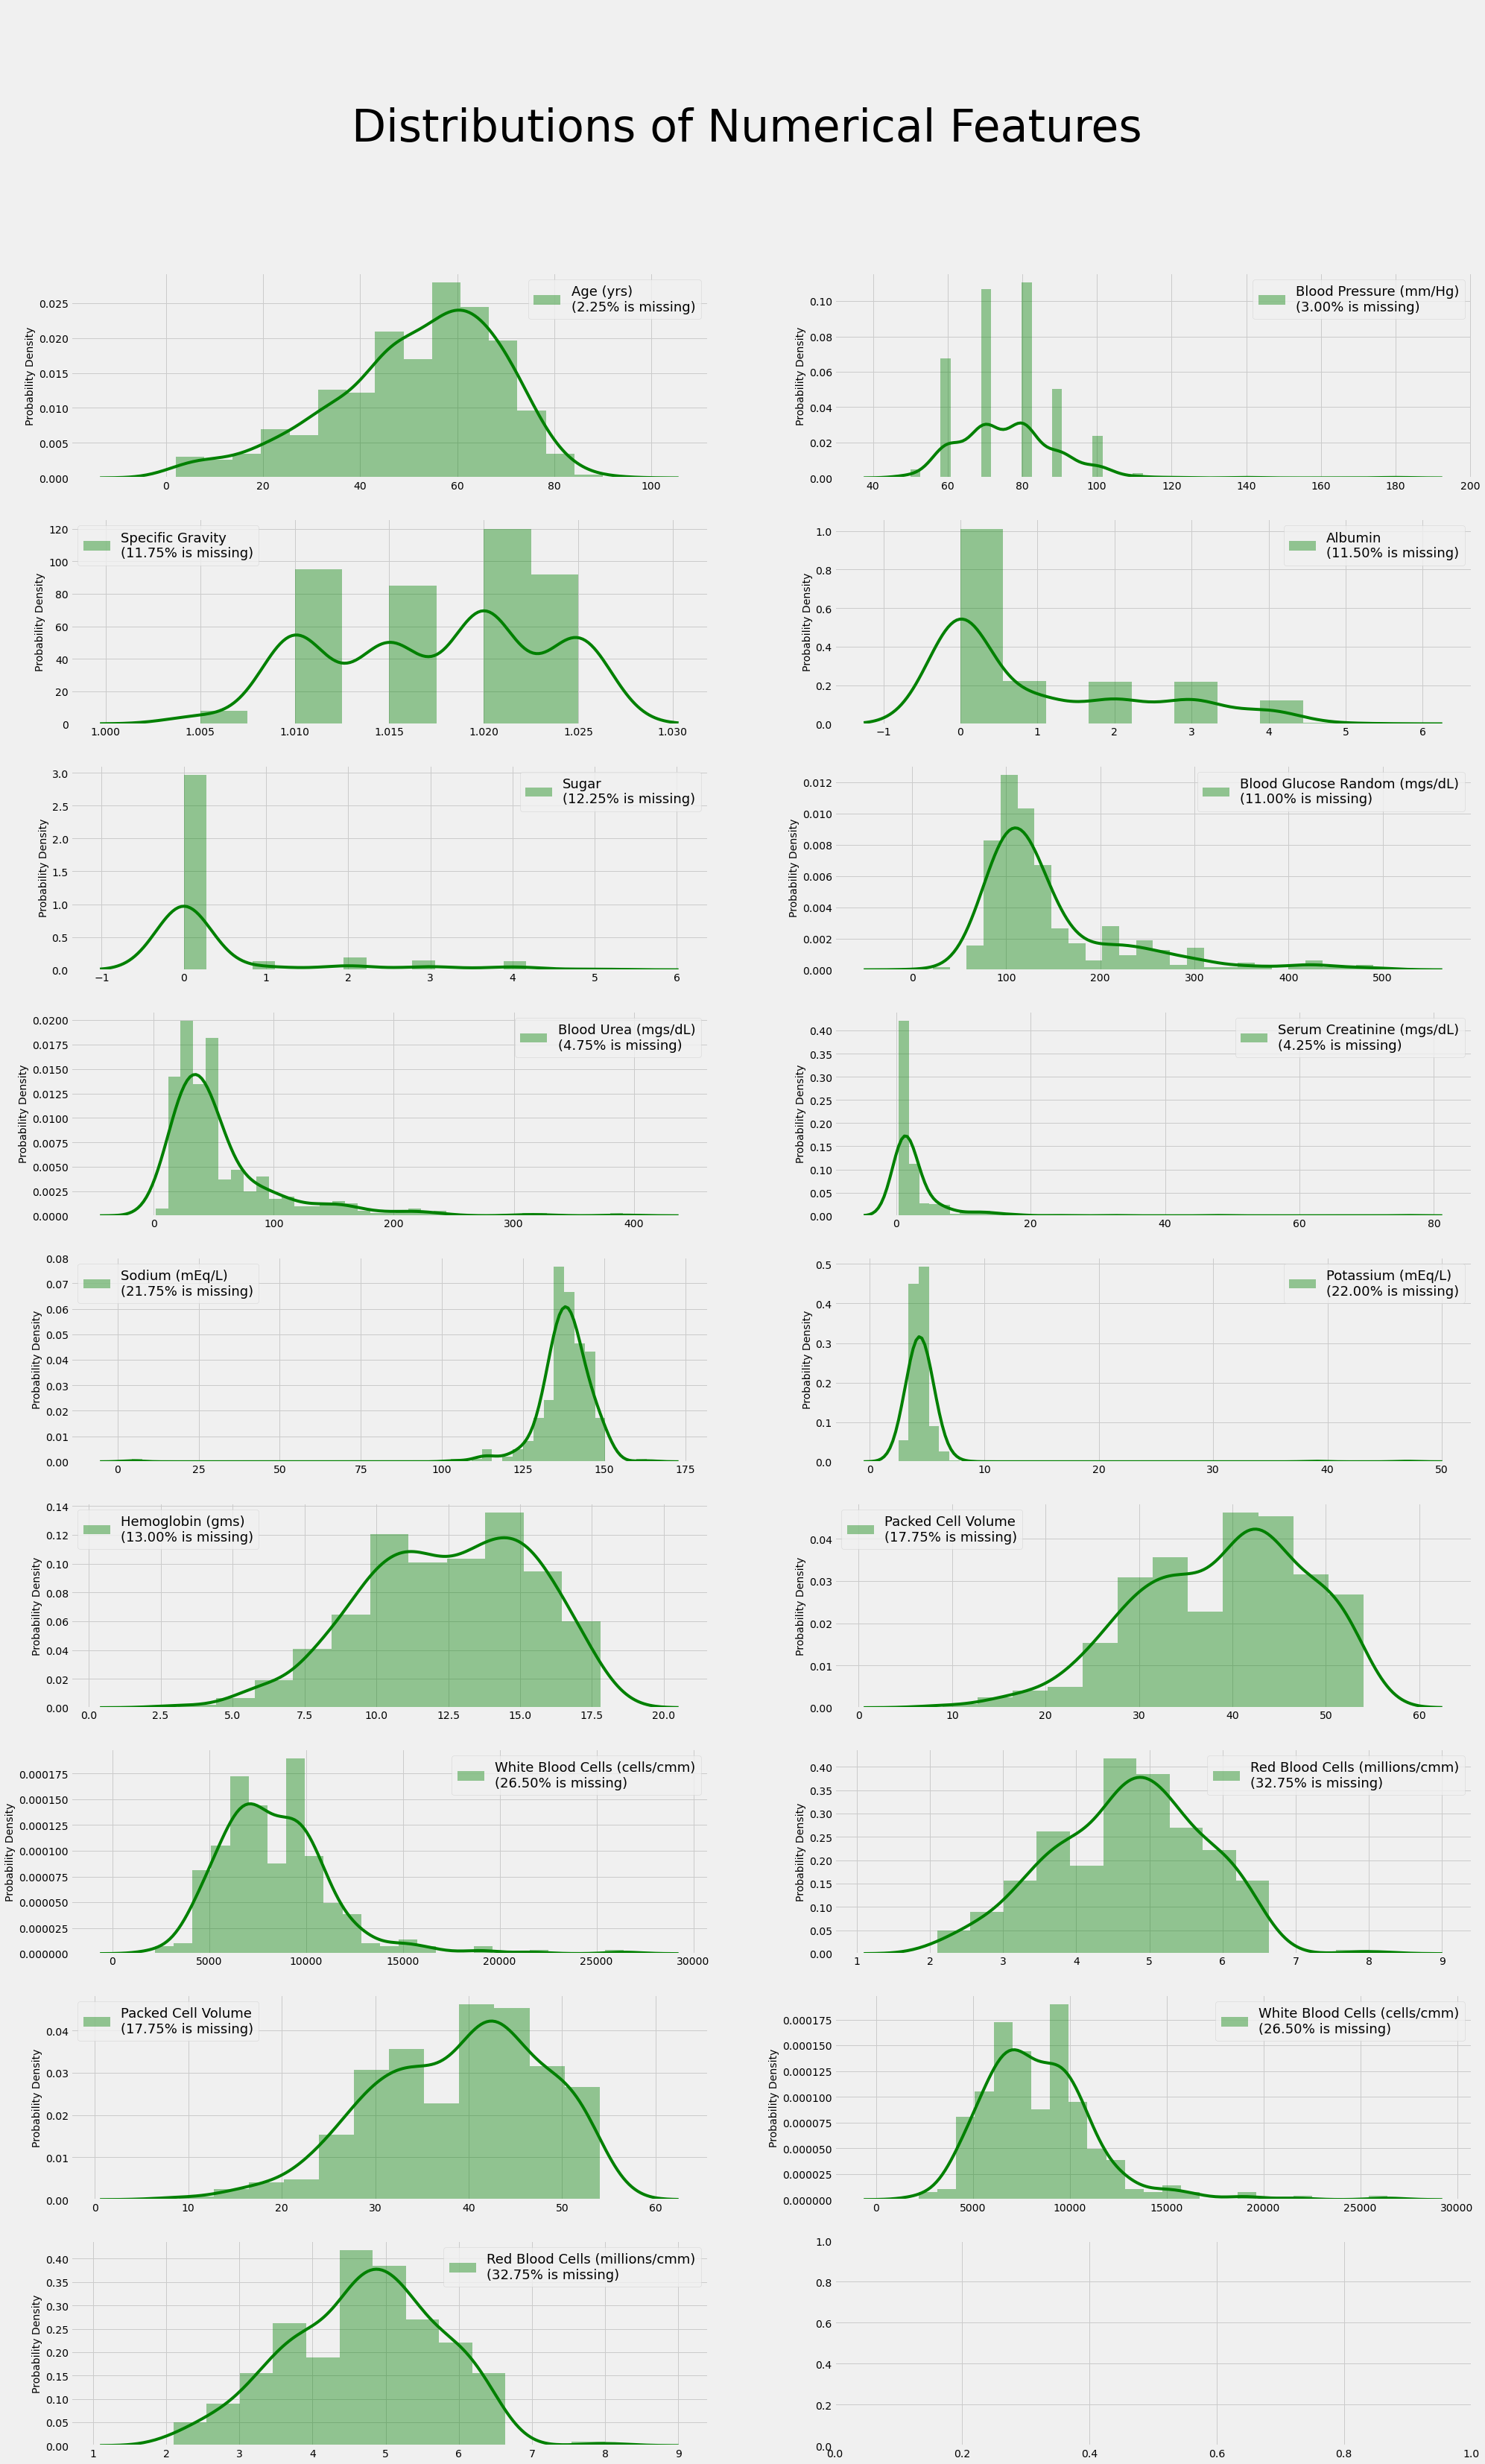

In [70]:
"distribution of numerical features"
import matplotlib.style as style
style.use('fivethirtyeight')
n_rows, n_cols = (9,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(30, 50))
figure.suptitle('\n\nDistributions of Numerical Features', fontsize=60)

for index, column in enumerate(numeric):
    
    i,j = (index // n_cols), (index % n_cols)
    
    miss_perc="%.2f"%(100*(1-(df[column].dropna().shape[0])/df.shape[0]))
    
    collabel=column+"\n({}% is missing)".format(miss_perc)
    
    fig=sns.distplot(df[column], color="g", label=collabel, norm_hist=True,
    
    ax=axes[i,j], kde_kws={"lw":4})
    
    fig=fig.legend(loc='best', fontsize=18)
    
    axes[i,j].set_ylabel("Probability Density",fontsize='medium')
    
    axes[i,j].set_xlabel(None)

plt.show()

### rq :
* Some features have high proportions of missing values 
* presence of distant outlier
* we have to deal with each features seperately 

now let s explore categorical features

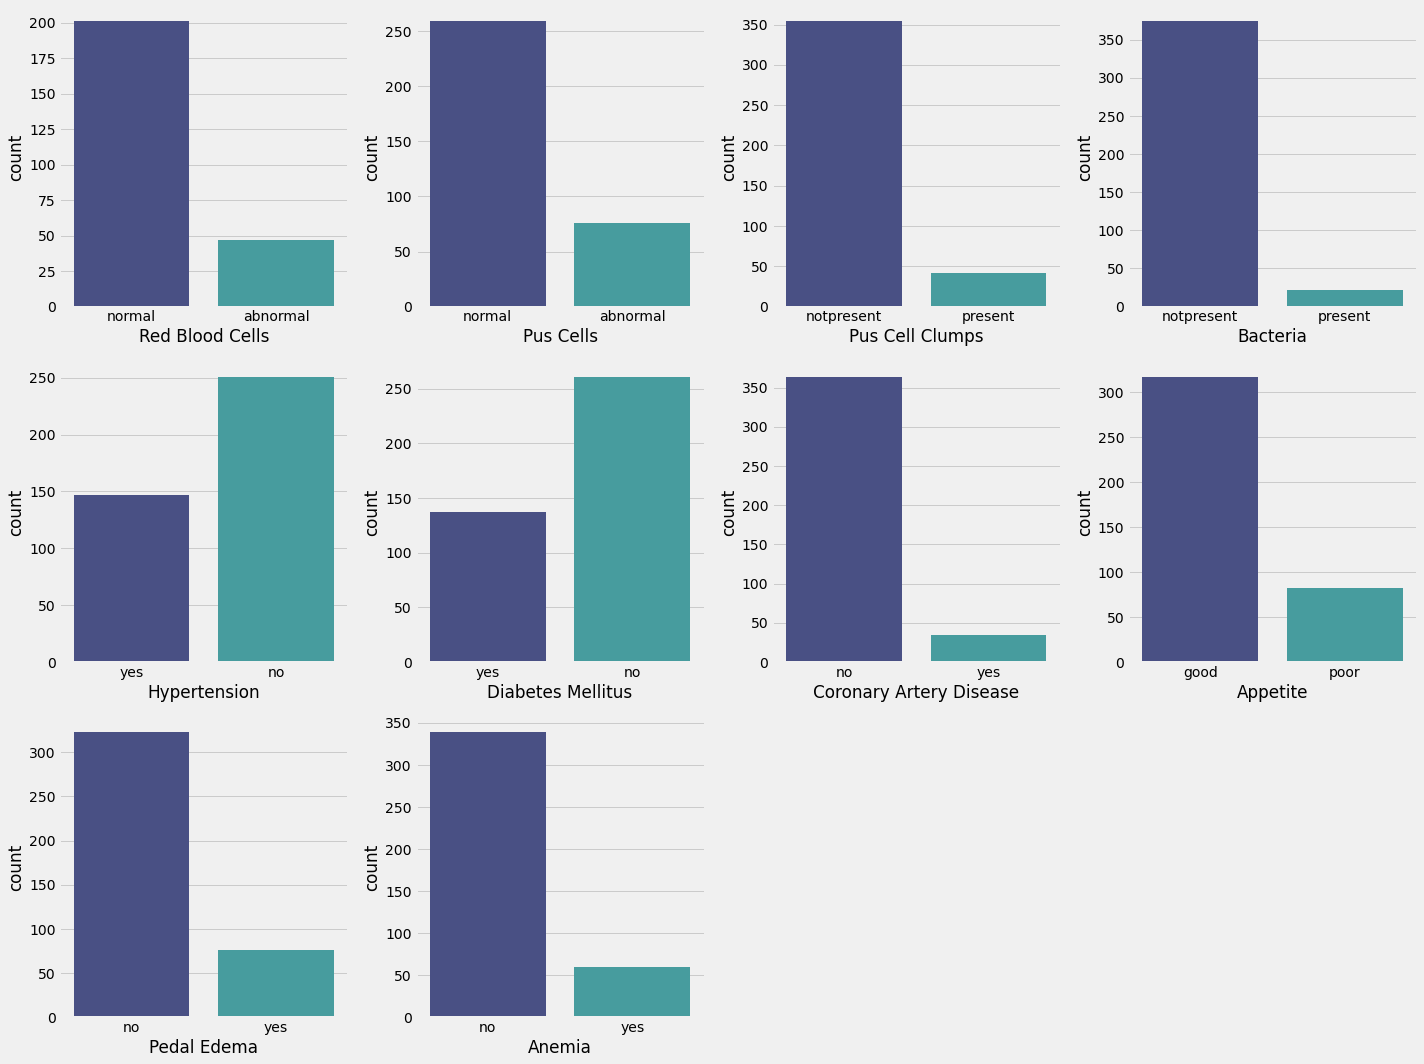

In [71]:

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'mako')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

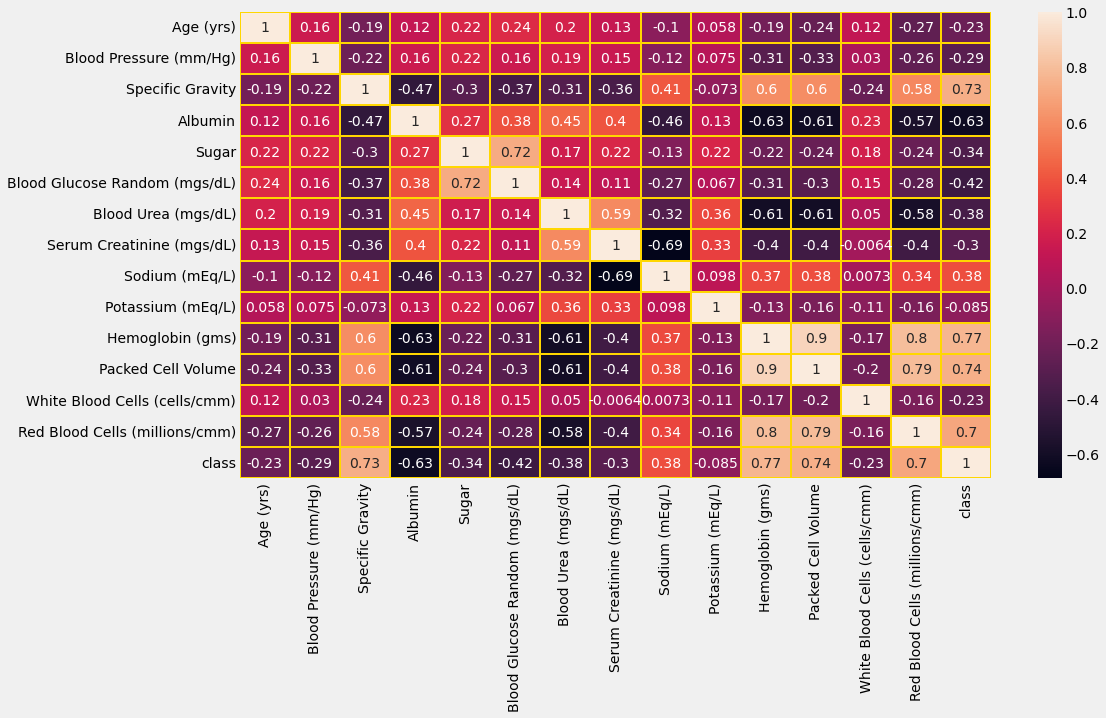

In [72]:
# heatmap of data

plt.figure(figsize = (15, 8))

sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'gold')
plt.show()

### Exploratory Data Analysis (EDA)

In [73]:
# defining functions to create plot

def violin(col):
    fig = px.violin(df, y=col, x="class", color="class", box=True, template = 'plotly_dark')
    return fig.show()

def kde(col):
    grid = sns.FacetGrid(df, hue="class", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()
    
def scatter(col1, col2):
    fig = px.scatter(df, x=col1, y=col2, color="class", template = 'plotly_dark')
    return fig.show()

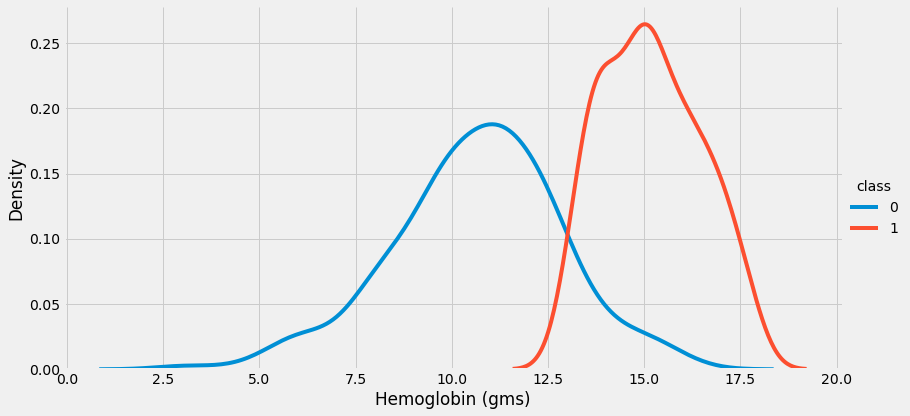

In [74]:
violin('Hemoglobin (gms)')
kde ('Hemoglobin (gms)')


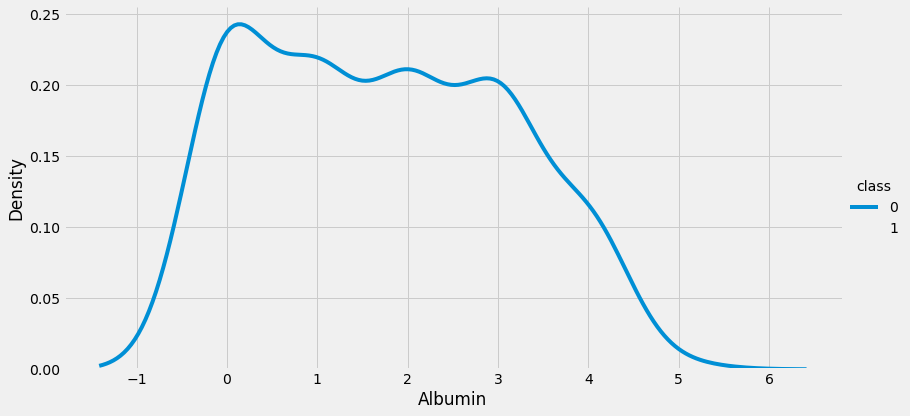

In [75]:
violin('Albumin')
kde ('Albumin')

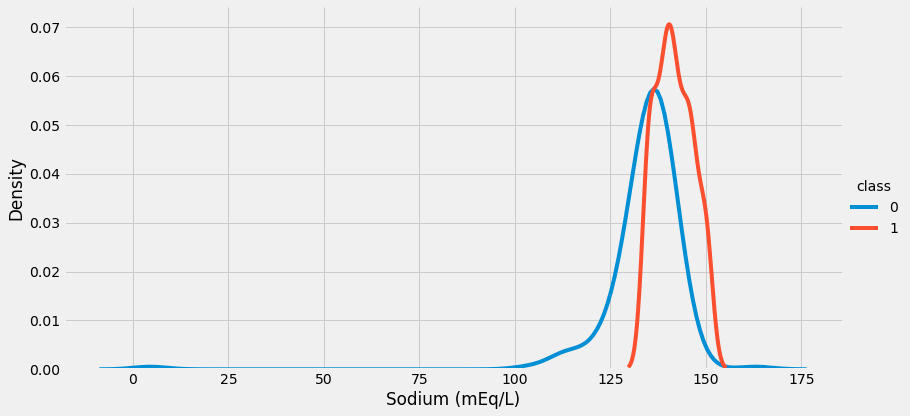

In [76]:
violin('Sodium (mEq/L)')
kde ('Sodium (mEq/L)')

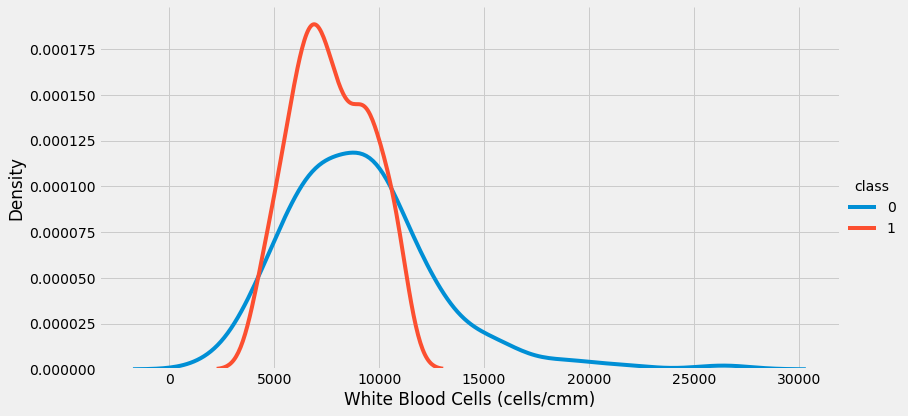

In [77]:
violin('White Blood Cells (cells/cmm)')
kde ('White Blood Cells (cells/cmm)')

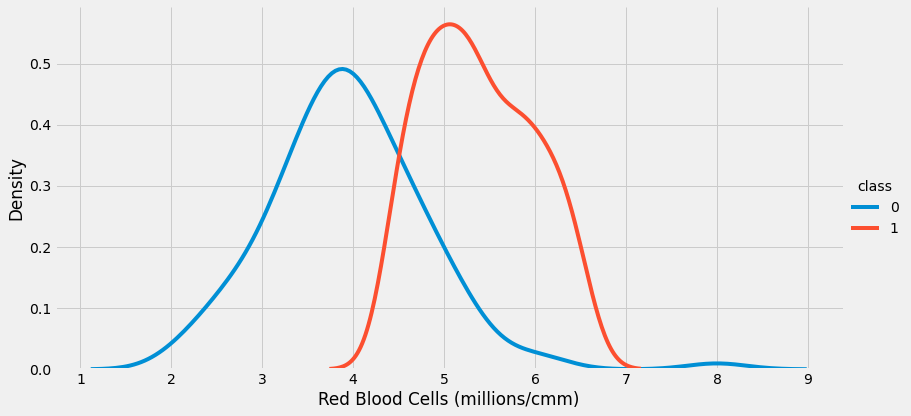

In [78]:
violin('Red Blood Cells (millions/cmm)')
kde ('Red Blood Cells (millions/cmm)')

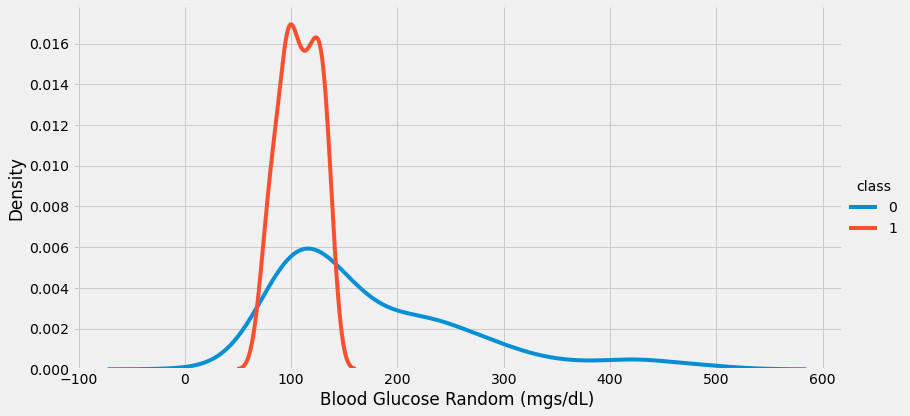

In [79]:
violin('Blood Glucose Random (mgs/dL)')
kde ('Blood Glucose Random (mgs/dL)')

In [80]:
scatter('Hemoglobin (gms)', 'Packed Cell Volume')

In [81]:
scatter('Sugar', 'Blood Glucose Random (mgs/dL)')

In [82]:
px.bar(df, x="Specific Gravity", y="Packed Cell Volume", color='class', barmode='group', template = 'ggplot2', height = 500)

### Categorical features  vs target features

In [83]:
n_rows, n_cols = (6,2)
import matplotlib.style as style
style.use('fivethirtyeight')

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(100, 150))
figure.suptitle('\n\nCategorical Features\nVS\nTarget Variable', fontsize=100)

for index, column in enumerate(categoricals):
    
    i,j = (index // n_cols), (index % n_cols)
    
    sns.heatmap(pd.crosstab(df[column],df['class']),
                ax=axes[i,j],
                cmap=sns.cubehelix_palette(start=2.8, rot=.1),
                square='True',
                cbar=False,
                annot=True,
                annot_kws={'fontsize':90},
                fmt='d')
        
    axes[i,j].set_xlabel("Disease", fontsize=90)

    axes[i,j].set_ylabel(column,fontsize=90)
    
    axes[i,j].set_yticklabels(axes[i,j].get_yticklabels(),fontsize=50)
    
    axes[i,j].set_xticklabels(["No CKD","CKD"],fontsize=50)

plt.show()

### Data pre processing

In [84]:
# checking for null values

df.isna().sum().sort_values(ascending = False)

Red Blood Cells                   152
Red Blood Cells (millions/cmm)    131
White Blood Cells (cells/cmm)     106
Potassium (mEq/L)                  88
Sodium (mEq/L)                     87
Packed Cell Volume                 71
Pus Cells                          65
Hemoglobin (gms)                   52
Sugar                              49
Specific Gravity                   47
Albumin                            46
Blood Glucose Random (mgs/dL)      44
Blood Urea (mgs/dL)                19
Serum Creatinine (mgs/dL)          17
Blood Pressure (mm/Hg)             12
Age (yrs)                           9
Bacteria                            4
Pus Cell Clumps                     4
Hypertension                        2
Diabetes Mellitus                   2
Coronary Artery Disease             2
Appetite                            1
Pedal Edema                         1
Anemia                              1
class                               0
dtype: int64

In [85]:
df[cat_cols].isnull().sum()

Red Blood Cells            152
Pus Cells                   65
Pus Cell Clumps              4
Bacteria                     4
Hypertension                 2
Diabetes Mellitus            2
Coronary Artery Disease      2
Appetite                     1
Pedal Edema                  1
Anemia                       1
dtype: int64

In [86]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']
df[num_cols].isnull().sum()

Age (yrs)                           9
Blood Pressure (mm/Hg)             12
Specific Gravity                   47
Albumin                            46
Sugar                              49
Blood Glucose Random (mgs/dL)      44
Blood Urea (mgs/dL)                19
Serum Creatinine (mgs/dL)          17
Sodium (mEq/L)                     87
Potassium (mEq/L)                  88
Hemoglobin (gms)                   52
Packed Cell Volume                 71
White Blood Cells (cells/cmm)     106
Red Blood Cells (millions/cmm)    131
class                               0
dtype: int64

take a look at missing val

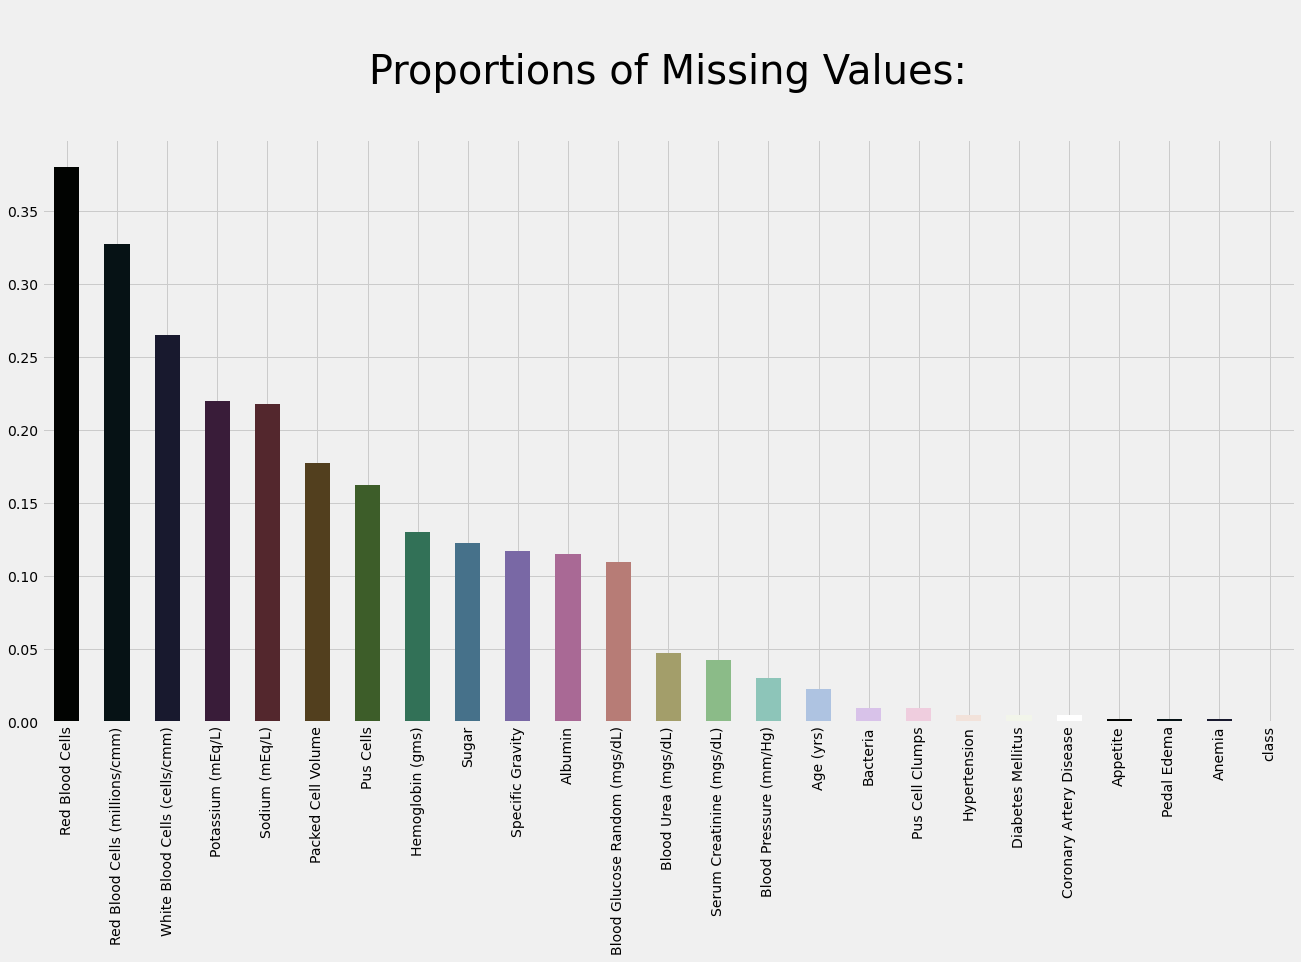

In [87]:

d=((df.isnull().sum()/df.shape[0])).sort_values(ascending=False)
d.plot(kind='bar',
       color=sns.cubehelix_palette(start=2,
                                    rot=3,
                                    dark=0.01,
                                    light=1,
                                    reverse=True,
                                    n_colors=21),
        figsize=(20,10))
plt.title("\nProportions of Missing Values:\n",fontsize=40)
plt.show()

In [88]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [89]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

In [90]:
df[num_cols].isnull().sum()

Age (yrs)                         0
Blood Pressure (mm/Hg)            0
Specific Gravity                  0
Albumin                           0
Sugar                             0
Blood Glucose Random (mgs/dL)     0
Blood Urea (mgs/dL)               0
Serum Creatinine (mgs/dL)         0
Sodium (mEq/L)                    0
Potassium (mEq/L)                 0
Hemoglobin (gms)                  0
Packed Cell Volume                0
White Blood Cells (cells/cmm)     0
Red Blood Cells (millions/cmm)    0
class                             0
dtype: int64

In [91]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('Red Blood Cells')
random_value_imputation('Pus Cells')

for col in cat_cols:
    impute_mode(col)

In [92]:
df[cat_cols].isnull().sum()

Red Blood Cells            0
Pus Cells                  0
Pus Cell Clumps            0
Bacteria                   0
Hypertension               0
Diabetes Mellitus          0
Coronary Artery Disease    0
Appetite                   0
Pedal Edema                0
Anemia                     0
dtype: int64

In [93]:
#usuing one hot encoding 

onehotdata=pd.get_dummies(df,drop_first=True,prefix_sep=': ')
onehotdata.head()

Age (yrs)  Blood Pressure (mm/Hg)  Specific Gravity  Albumin  Sugar  \
0       48.0                    80.0             1.020      1.0    0.0   
1        7.0                    50.0             1.020      4.0    0.0   
2       62.0                    80.0             1.010      2.0    3.0   
3       48.0                    70.0             1.005      4.0    0.0   
4       51.0                    80.0             1.010      2.0    0.0   

   Blood Glucose Random (mgs/dL)  Blood Urea (mgs/dL)  \
0                          121.0                 36.0   
1                          122.0                 18.0   
2                          423.0                 53.0   
3                          117.0                 56.0   
4                          106.0                 26.0   

   Serum Creatinine (mgs/dL)  Sodium (mEq/L)  Potassium (mEq/L)  \
0                        1.2           141.0                5.3   
1                        0.8           138.0                3.4   
2                        1.8           138.0                4.4   
3                        3.8           111.0                2.5   
4                        1.4           142.0                4.4   

   Hemoglobin (gms)  Packed Cell Volume  White Blood Cells (cells/cmm)  \
0              15.4                44.0                         7800.0   
1              11.3                38.0                         6000.0   
2               9.6                31.0                         7500.0   
3              11.2                32.0                         6700.0   
4              11.6                35.0                         7300.0   

   Red Blood Cells (millions/cmm)  class  Red Blood Cells: normal  \
0                             5.2      0                        1   
1                             3.9      0                        1   
2                             4.2      0                        1   
3                             3.9      0                        1   
4                             4.6      0                        1   

   Pus Cells: normal  Pus Cell Clumps: present  Bacteria: present  \
0                  1                         0                  0   
1                  1                         0                  0   
2                  1                         0                  0   
3                  0                         1                  0   
4                  1                         0                  0   

   Hypertension: yes  Diabetes Mellitus: yes  Coronary Artery Disease: yes  \
0                  1                       1                             0   
1                  0                       0                             0   
2                  0                       1                             0   
3                  1                       0                             0   
4                  0                       0                             0   

   Appetite: poor  Pedal Edema: yes  Anemia: yes  
0               0                 0            0  
1               0                 0            0  
2               1                 0            1  
3               1                 1            1  
4               0                 0            0

In [94]:
names={}
for name in df.columns:
    for ohname in onehotdata.columns:
        if name+': ' in ohname and name in categoricals:
            names[name]=ohname
            for i in range(400):
                if type(df.loc[i,name])!=str:
                    if math.isnan(df.loc[i,name]):
                        onehotdata.loc[i,ohname]=df.loc[i,name]

((pd.isna(df)==pd.isna(test_oh_dt))==False).sum()

NameError: name 'test_oh_dt' is not defined

# feature encoding

In [95]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

Red Blood Cells has 2 categories

Pus Cells has 2 categories

Pus Cell Clumps has 2 categories

Bacteria has 2 categories

Hypertension has 2 categories

Diabetes Mellitus has 2 categories

Coronary Artery Disease has 2 categories

Appetite has 2 categories

Pedal Edema has 2 categories

Anemia has 2 categories



Since all of our columns have two classes, we can use the label encoder

In [96]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [97]:
df.head()

Age (yrs)  Blood Pressure (mm/Hg)  Specific Gravity  Albumin  Sugar  \
0       48.0                    80.0             1.020      1.0    0.0   
1        7.0                    50.0             1.020      4.0    0.0   
2       62.0                    80.0             1.010      2.0    3.0   
3       48.0                    70.0             1.005      4.0    0.0   
4       51.0                    80.0             1.010      2.0    0.0   

   Red Blood Cells  Pus Cells  Pus Cell Clumps  Bacteria  \
0                1          1                0         0   
1                1          1                0         0   
2                1          1                0         0   
3                1          0                1         0   
4                1          1                0         0   

   Blood Glucose Random (mgs/dL)  Blood Urea (mgs/dL)  \
0                          121.0                 36.0   
1                          122.0                 18.0   
2                          423.0                 53.0   
3                          117.0                 56.0   
4                          106.0                 26.0   

   Serum Creatinine (mgs/dL)  Sodium (mEq/L)  Potassium (mEq/L)  \
0                        1.2           141.0                5.3   
1                        0.8           138.0                3.4   
2                        1.8           138.0                4.4   
3                        3.8           111.0                2.5   
4                        1.4           142.0                4.4   

   Hemoglobin (gms)  Packed Cell Volume  White Blood Cells (cells/cmm)  \
0              15.4                44.0                         7800.0   
1              11.3                38.0                         6000.0   
2               9.6                31.0                         7500.0   
3              11.2                32.0                         6700.0   
4              11.6                35.0                         7300.0   

   Red Blood Cells (millions/cmm)  Hypertension  Diabetes Mellitus  \
0                             5.2             1                  1   
1                             3.9             0                  0   
2                             4.2             0                  1   
3                             3.9             1                  0   
4                             4.6             0                  0   

   Coronary Artery Disease  Appetite  Pedal Edema  Anemia  class  
0                        0         0            0       0      0  
1                        0         0            0       0      0  
2                        0         1            0       1      0  
3                        0         1            1       1      0  
4                        0         0            0       0      0

### Clustering and prediction

In [98]:
X=onehotdata.drop("class",axis=1,inplace=False)
Y=onehotdata["class"]

In [99]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)



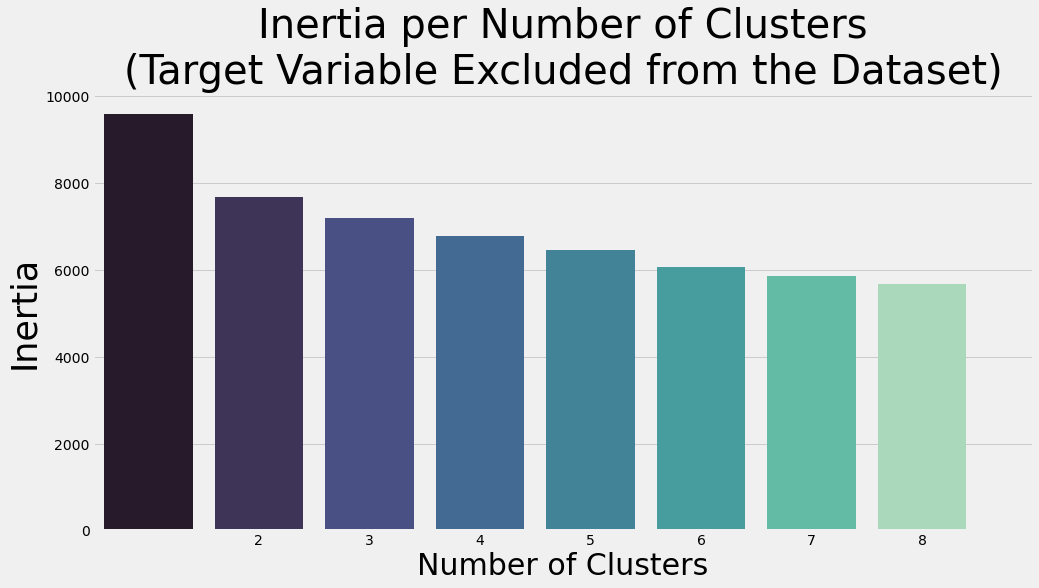

In [100]:
from sklearn.cluster import KMeans
inertias = []

ks=list(range(1,9))

for k in ks:
    model=KMeans(n_clusters=k)
    
    model.fit(X)
    
    inertias.append(model.inertia_)

plt.figure(figsize=(15,7.5))
sns.barplot(ks, inertias, palette='mako')
plt.xlabel('Number of Clusters',fontsize=30)
plt.ylabel('Inertia',fontsize=35)
plt.xticks(ks)
plt.title("Inertia per Number of Clusters\n(Target Variable Excluded from the Dataset)",fontsize=40)
plt.show()

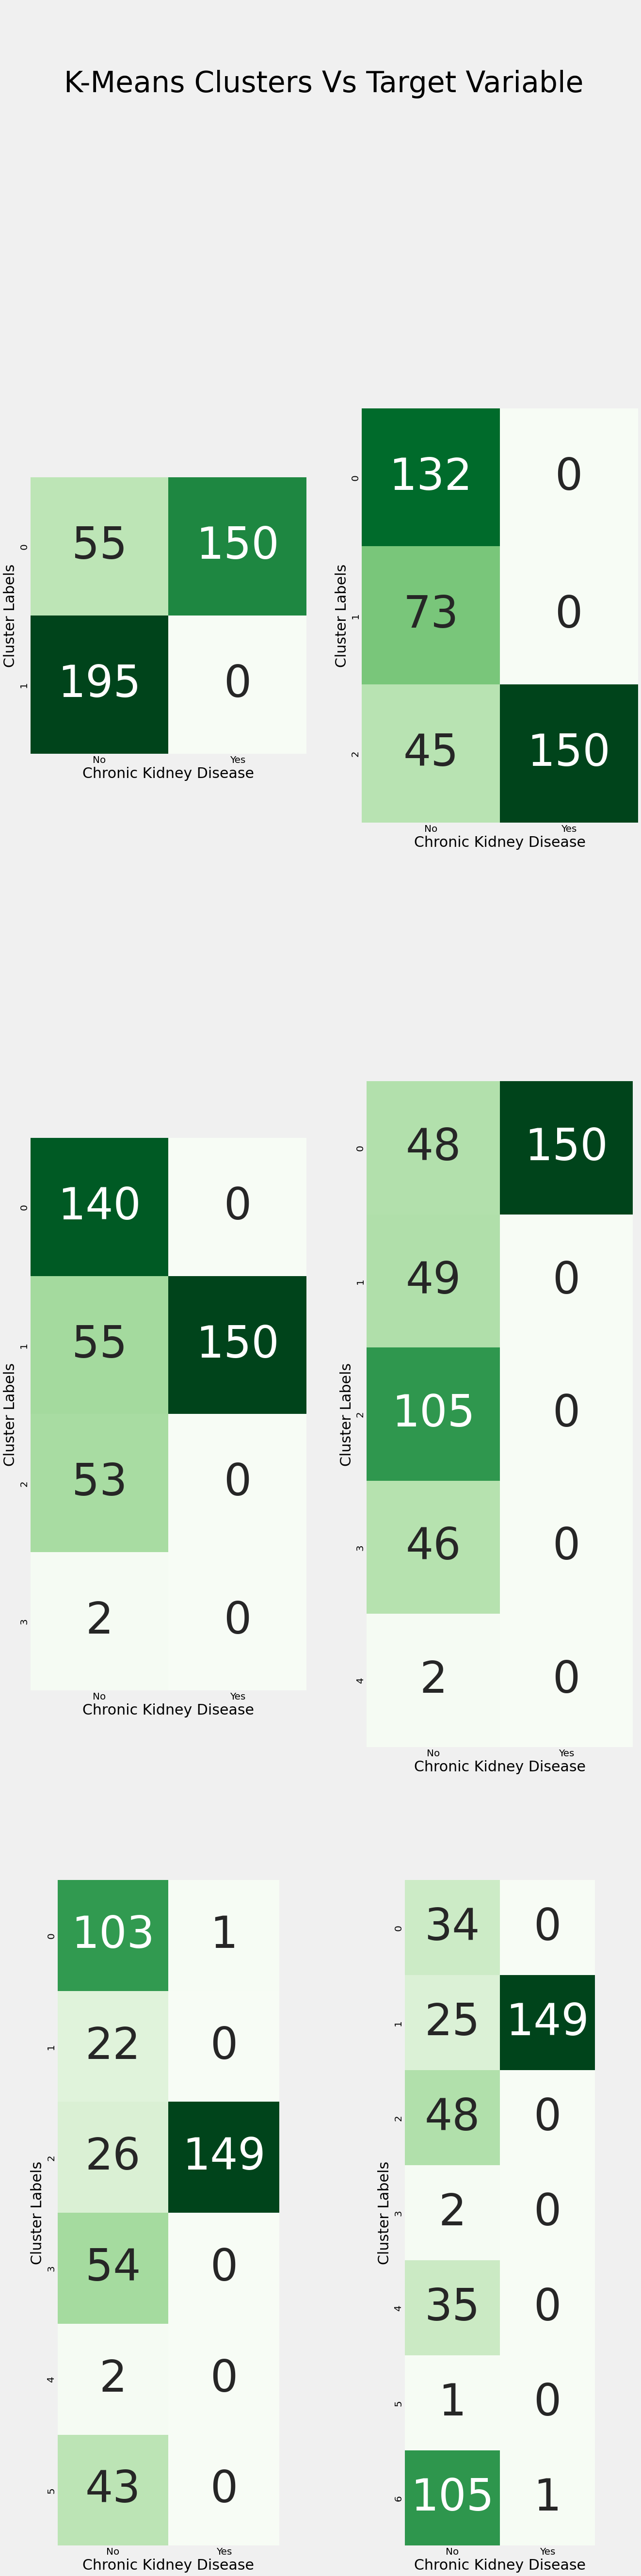

In [101]:
n_rows, n_cols = (3,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(20, 80))
figure.suptitle('\n\nK-Means Clusters Vs Target Variable', fontsize=60)

for index in range(6):
    
    i,j = (index // n_cols), (index % n_cols)
    
    model=KMeans(n_clusters=index+2)
    
    model.fit(X)
    
    cluster_labels=model.predict(X)
    
    sns.heatmap(pd.crosstab(cluster_labels,Y),
                ax=axes[i,j],
                cmap='Greens',
                square='True',
                cbar=False,
                annot=True,
                annot_kws={'fontsize':90},
                fmt='d')
    
    axes[i,j].set_xlabel("Chronic Kidney Disease",fontsize=30)

    axes[i,j].set_ylabel("Cluster Labels",fontsize=30)
    
    axes[i,j].set_yticklabels(axes[i,j].get_yticklabels(),fontsize=20)
    
    axes[i,j].set_xticklabels(["No","Yes"],fontsize=20)
plt.show()

* With 5 and 6 clusters, one can notice a cluster containing only two ill people. I think that might be a sign of overfitting
* now let s try kmeans with pca

In [102]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

In [103]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [104]:
df.head()

Age (yrs)  Blood Pressure (mm/Hg)  Specific Gravity  Albumin  Sugar  \
0       48.0                    80.0             1.020      1.0    0.0   
1        7.0                    50.0             1.020      4.0    0.0   
2       62.0                    80.0             1.010      2.0    3.0   
3       48.0                    70.0             1.005      4.0    0.0   
4       51.0                    80.0             1.010      2.0    0.0   

   Red Blood Cells  Pus Cells  Pus Cell Clumps  Bacteria  \
0                1          1                0         0   
1                1          1                0         0   
2                1          1                0         0   
3                1          0                1         0   
4                1          1                0         0   

   Blood Glucose Random (mgs/dL)  Blood Urea (mgs/dL)  \
0                          121.0                 36.0   
1                          122.0                 18.0   
2                          423.0                 53.0   
3                          117.0                 56.0   
4                          106.0                 26.0   

   Serum Creatinine (mgs/dL)  Sodium (mEq/L)  Potassium (mEq/L)  \
0                        1.2           141.0                5.3   
1                        0.8           138.0                3.4   
2                        1.8           138.0                4.4   
3                        3.8           111.0                2.5   
4                        1.4           142.0                4.4   

   Hemoglobin (gms)  Packed Cell Volume  White Blood Cells (cells/cmm)  \
0              15.4                44.0                         7800.0   
1              11.3                38.0                         6000.0   
2               9.6                31.0                         7500.0   
3              11.2                32.0                         6700.0   
4              11.6                35.0                         7300.0   

   Red Blood Cells (millions/cmm)  Hypertension  Diabetes Mellitus  \
0                             5.2             1                  1   
1                             3.9             0                  0   
2                             4.2             0                  1   
3                             3.9             1                  0   
4                             4.6             0                  0   

   Coronary Artery Disease  Appetite  Pedal Edema  Anemia  class  
0                        0         0            0       0      0  
1                        0         0            0       0      0  
2                        0         1            0       1      0  
3                        0         1            1       1      0  
4                        0         0            0       0      0

### Model building

In [105]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

In [106]:
# splitting data intp training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

# KNN 

In [107]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")




Training Accuracy of KNN is 0.7642857142857142
Test Accuracy of KNN is 0.6833333333333333 

Confusion Matrix :- 
[[49 23]
 [15 33]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.77      0.68      0.72        72
           1       0.59      0.69      0.63        48

    accuracy                           0.68       120
   macro avg       0.68      0.68      0.68       120
weighted avg       0.70      0.68      0.69       120



## Decision Tree Classifier 

In [108]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9666666666666667 

Confusion Matrix :- 
[[72  0]
 [ 4 44]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.92      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



In [109]:
# hyper parameter tuning of decision tree 

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [110]:
# best parameters and best score

print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'best'}
0.9821428571428571


In [111]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.9714285714285714
Test Accuracy of Decision Tree Classifier is 0.9666666666666667 

Confusion Matrix :- 
[[71  1]
 [ 3 45]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.98      0.94      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.97       120
weighted avg       0.97      0.97      0.97       120



# Random Forest Classifier

In [112]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.975 

Confusion Matrix :- 
[[72  0]
 [ 3 45]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.94      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



### Ada Boost Classifier

In [114]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of ada boost

ada_acc = accuracy_score(y_test, ada.predict(X_test))

print(f"Training Accuracy of Ada Boost Classifier is {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Test Accuracy of Ada Boost Classifier is {ada_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, ada.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, ada.predict(X_test))}")

Training Accuracy of Ada Boost Classifier is 1.0
Test Accuracy of Ada Boost Classifier is 0.9833333333333333 

Confusion Matrix :- 
[[72  0]
 [ 2 46]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [117]:
models = pd.DataFrame({
      'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier'],
    'Score' : [knn_acc, dtc_acc, rd_clf_acc, ada_acc]
})


models.sort_values(by = 'Score', ascending = False)

Model     Score
3      Ada Boost Classifier  0.983333
2  Random Forest Classifier  0.975000
1  Decision Tree Classifier  0.966667
0                       KNN  0.683333

In [120]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')